# **Custos Médicos - Árvores de Decisão (Regressão)**

A ideia neste problema é estimar o custo do seguro no plano de saúde para uma pessoa com base em dados adicionais como idade, si é fumante ou não, se tem dependentes, etc.

Isto quer dizer que temos considerar que nuestra variável dependiente será o Custo e as caraterísticas restantes serão consideradas como as variáveis independientes, em outras palavras Custo depende (umas vezes mais e outras menos) de todas as outras variáveis

O Primeiro a fazer é estabelecer a influencia de todas essas variáveis (caraterísticas) no valor final dos Custos Médicos, de forma individual.

É importante lembrar que temos que ter a capacidade de predecir um valor de custo para uma nova pessoa (cliente) dados as suas proprias caraterísticas.

Iniciemos esta análise selecionando os dados que vamos a utilizar.

Vamos importar os dados:

# Importação dos Dados:

Os dados podem ser obtido do site do Kaggle.com. Podemos fazer um download e depois abrir ou também importar diretamente usando um link onde esta o arquivo. Esses dados serão guardados na variável **dados** do tipo _dataframe_.

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
dados = pd.read_csv(url)
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Informações dos dados e Mise en place:

Obter informações gerais dos dados como número de variáveis, tipo, etc. Os comandos podem ser visualizados e entendidos melhor nos anteriores scripts (Custos_Medicos.ipynb, etc)

Lembrar o que foi feito nos modelos anteriores:

* Transformar a variável **Fumante** em 0 (não) ou 1 (sim)
* Colocar a variável resposta na escala para cada mil dolares.

Nesta análise também vamos considerar só as variáveis:
* var. dependiente: **Custos**
* var. independientes: indice de massa corporal (**IMC**) e ser fumante ou não.

In [ ]:
# mise en place

dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})
dados['charges'] = dados['charges']/1000 
dados = dados[['bmi', 'smoker', 'charges']]
dados.head()

,bmi,smoker,charges
0,27.900,1,16.884924
1,33.770,0,1.725552
2,33.000,0,4.449462
3,22.705,0,21.984471
4,28.880,0,3.866855


---
---

## Árvores de Decisão

Primeiro temos que importar a biblioteca -> _sklearn.tree_

onde sera usado o comando -> _DecesionTreeRegressor_

Começamos usando uma profundidade = 7 (número arbitrario) que indica o número decisões (remificações), só para mostrar o método.

O proceso sera repetido R = 100 vezes, a fim de fazer uma estatística e verificar a consistência dos resultados.

### Com uma variável independente:

A primeira parte sera usando só uma variável independente **IMC** (índice de massa corporal) e o **Custo** como variável dependiente 

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split 
import numpy as np

profundidade = 7

R = 100
eqms_treino = []
eqms_teste = []

X = dados[['bmi']]
y = dados['charges']

for i in range(R):
    Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)

    arvore = DecisionTreeRegressor(max_depth = profundidade)
    arvore.fit(Xtreino, ytreino) 

    preditos_treino = arvore.predict(Xtreino)
    eqm_treino = mean_squared_error(preditos_treino, ytreino)
    eqms_treino.append(eqm_treino)

    preditos_teste = arvore.predict(Xteste)
    eqm_teste = mean_squared_error(preditos_teste, yteste)
    eqms_teste.append(eqm_teste)
 
print('O Erro Quadrático Médio de TREINO foi: {:.2f}'.format(np.mean(eqms_treino)))
print('O Erro Quadrático Médio de TESTE  foi:  {:.2f}'.format(np.mean(eqms_teste)))

O Erro Quadrático Médio de TREINO foi: 118.61
O Erro Quadrático Médio de TESTE  foi:  170.16


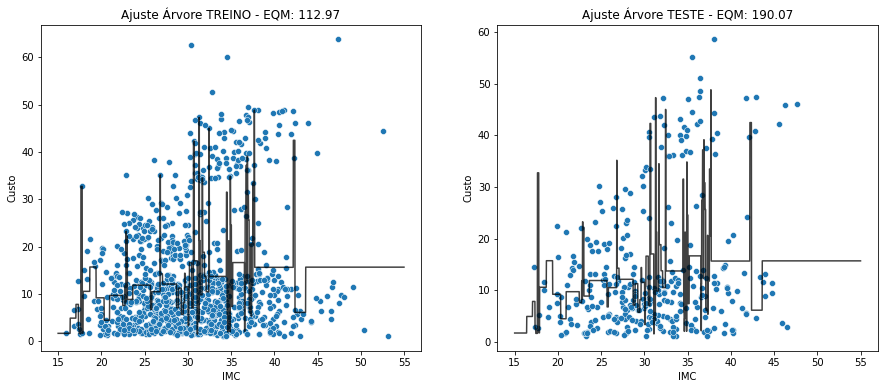

In [ ]:
# Gráfico da Árvore com 1 Variável 

import matplotlib.pyplot as plt
import seaborn as sns

X = dados[['bmi']]
y = dados['charges']

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)

arvore = DecisionTreeRegressor(max_depth = profundidade)
arvore.fit(Xtreino, ytreino)

preditos_treino = arvore.predict(Xtreino)
preditos_teste = arvore.predict(Xteste)

eqm_treino = mean_squared_error(preditos_treino, ytreino)
eqm_teste = mean_squared_error(preditos_teste, yteste) 

import numpy as np

x = np.arange(15, 55, 0.01)
y = arvore.predict(pd.DataFrame({'bmi': x}))

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x = Xtreino['bmi'], y = ytreino)
plt.plot(x, y, color = 'black', alpha = 0.75)
plt.title('Ajuste Árvore TREINO - EQM: ' + str(round(eqm_treino, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo')  

plt.subplot(1, 2, 2)
sns.scatterplot(x = Xteste['bmi'], y = yteste)
plt.plot(x, y, color = 'black', alpha = 0.75)
plt.title('Ajuste Árvore TESTE - EQM: ' + str(round(eqm_teste, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo') 
plt.show()

### Com duas variáveis independentes:

A segunda parte sera usando duas variáveis independentes **IMC** (índice de massa corporal) e ser **fumante** (variável categórica). O **Custo** é considerada a variável dependiente. 

Começamos usando uma profundidade = 7 (número arbitrario) que indica o número decisões (remificações), só para mostrar o método.

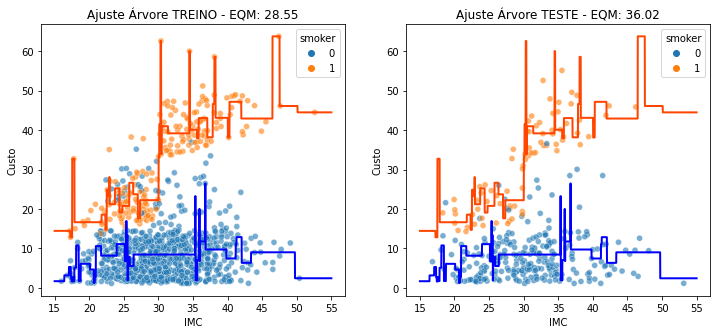

In [ ]:
# Gráfico da Árvore com 2 Variáveis
 
X = dados[['bmi', 'smoker']]
y = dados['charges'] 

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
 
arvore = DecisionTreeRegressor(max_depth = profundidade)
arvore.fit(Xtreino, ytreino)

preditos_treino = arvore.predict(Xtreino)
preditos_teste = arvore.predict(Xteste)

eqm_treino = mean_squared_error(preditos_treino, ytreino)
eqm_teste = mean_squared_error(preditos_teste, yteste) 

import numpy as np
 
x = np.arange(15, 55, 0.01)
v0 = np.zeros(len(x))
v1 = np.ones(len(x))

c0 = pd.DataFrame([x, v0], index = ['bmi', 'smoker']).T
c1 = pd.DataFrame([x, v1], index = ['bmi', 'smoker']).T

d0 = arvore.predict(c0)
d1 = arvore.predict(c1)

plt.figure(figsize = (12, 5))

plt.subplot(1, 2, 1) 
sns.scatterplot(x = Xtreino['bmi'], y = ytreino, hue =  Xtreino['smoker'], alpha = 0.6)
plt.plot(x, d0, '-', color = 'blue', linewidth = 2)
plt.plot(x, d1, '-', color = 'orangered', linewidth = 2)
plt.title('Ajuste Árvore TREINO - EQM: ' + str(round(eqm_treino, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo')  

plt.subplot(1, 2, 2) 
sns.scatterplot(x = Xteste['bmi'], y = yteste, hue =  Xteste['smoker'], alpha = 0.6)
plt.plot(x, d0, '-', color = 'blue', linewidth = 2)
plt.plot(x, d1, '-', color = 'orangered', linewidth = 2) 
plt.title('Ajuste Árvore TESTE - EQM: ' + str(round(eqm_teste, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo') 

plt.show()

**Plot Tree:**

Uma outra forma mostar o gráfico numa árvore de decisão é graficar as decisões para poder entender como foi feita a decisão. para isto usamos o comando -> _plot_tree_

Neste exemplo vamos considerar duas variáveis e com parâmetro de profundidade = 3 e acrescentamos um novo parâmetro min_samples_split = 120 que será o número de amostras mínimas para fazer o teste (quando tem menos de 120 para o processo)  

Importante: Para este exemplo não foi separado em treino e teste!

Como resultado podemos ver que no gráfico:
* variáveis X[0] = **IMC** ,  X[1] = **fumante**
* A primeira decisão equivale se é fumante ou não (lado ezquerdo não é fumante e do lado direito é fumante), então separa em duas ramificações.
* na segunda decisão podemos ver: no lado direito,  **IMC** é menor que 30 e ao mesmo tempo é fumante, como resultado temos se a condição e verdadeira temos 144 elementos e se for não temos 130 elementos. Para esta ramificações não podemos continuar, por ter menos de 150 em cada grupo.  
*  Para a outra ramificação (segunda) podemos ver ...
* A soma de todos os elemntos de cada ramificação tem que dar o valor total de elementos. 


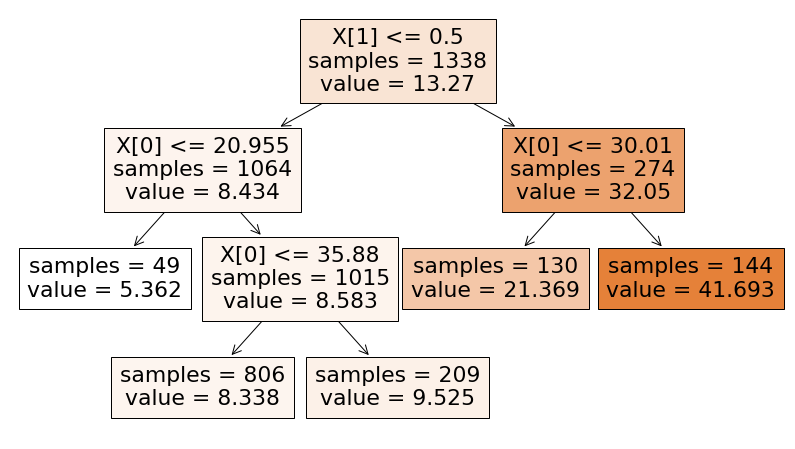

In [ ]:
# Gráfico da Árvore

from sklearn.tree import plot_tree

X = dados[['bmi', 'smoker']]
y = dados['charges']

arvore = DecisionTreeRegressor(max_depth = 3, min_samples_split = 150)
arvore.fit(X, y)

plt.figure(figsize = (14, 8))
plot_tree(arvore, filled=True, proportion = False, impurity = False)
plt.show()

---
---

## **Comparação dos Modelos**

## Técnica de Validação: _Holdout Repetido_

Por ser aleatoria a seleção dos conjuntos, é melhor fazer varias vezes este procedimento e assim obter uma estatística para calcular o valor mais estável para o EQM.

Como será feita uma comparação entre os modelo: **Arvore de decisão** (com diferentes valores de profundidades), de **K-NN** (com diferentes valores de k) e de **Regressão Linear** é preferível criar uma função a qual será chamada por cada modelo.  

In [ ]:
def HoldoutRepetido(modelo, replicas = 100, proporcao = 0.25): 

    eqms_treino = []
    eqms_teste = []

    for i in range(replicas):
        Xtreino , Xteste, ytreino, yteste  = train_test_split(X, y, test_size = proporcao)
        
        #Treinando o Modelo
        reg = modelo
        reg.fit(Xtreino, ytreino)

        #Verificando o eqm no teste
        preditos_treino = reg.predict(Xtreino) 
        eqm_treino = mean_squared_error(ytreino, preditos_treino)

        preditos_teste = reg.predict(Xteste)
        eqm_teste = mean_squared_error(yteste, preditos_teste)

        #Guardando o resultado
        eqms_treino.append(eqm_treino)
        eqms_teste.append(eqm_teste)
    
    res_treino = np.array(eqms_treino).mean().round(2)
    res_teste = np.array(eqms_teste).mean().round(2)

    print('EQM médio de TREINO: {}'.format(res_treino))
    print('EQM médio de TESTE: {}\n'.format(res_teste))

    return res_treino, res_teste 

In [ ]:
from sklearn.linear_model import LinearRegression

X = dados[['bmi', 'smoker']]
y = dados['charges']

modelos = [LinearRegression(), 
           KNeighborsRegressor(n_neighbors = 5), 
           KNeighborsRegressor(n_neighbors = 15),
           KNeighborsRegressor(n_neighbors = 25),
           KNeighborsRegressor(n_neighbors = 35),
           KNeighborsRegressor(n_neighbors = 45),
           DecisionTreeRegressor(max_depth = 1),
           DecisionTreeRegressor(max_depth = 2),
           DecisionTreeRegressor(max_depth = 3),
           DecisionTreeRegressor(max_depth = 4),
           DecisionTreeRegressor(max_depth = 5)]

nomes = ['Regressão Linear',
         'KNN - K = 5', 
         'KNN - K = 15', 
         'KNN - K = 25', 
         'KNN - K = 35', 
         'KNN - K = 45',
         'Árvore - Prof = 1',
         'Árvore - Prof = 2',
         'Árvore - Prof = 3',
         'Árvore - Prof = 4',
         'Árvore - Prof = 5']

treinos = []
testes = []

for modelo in modelos:
    resultados = HoldoutRepetido(modelo)
    treinos.append(resultados[0])
    testes.append(resultados[1])

aux = {'EQM Treino': treinos, 'EQM Teste': testes}
resultados = pd.DataFrame(aux, index = nomes)
resultados.sort_values(by = 'EQM Teste')

EQM médio de TREINO: 50.06
EQM médio de TESTE: 50.55

EQM médio de TREINO: 31.4
EQM médio de TESTE: 47.18

EQM médio de TREINO: 44.13
EQM médio de TESTE: 50.86

EQM médio de TREINO: 54.01
EQM médio de TESTE: 59.61

EQM médio de TREINO: 67.52
EQM médio de TESTE: 72.08

EQM médio de TREINO: 80.41
EQM médio de TESTE: 85.7

EQM médio de TREINO: 55.95
EQM médio de TESTE: 55.21

EQM médio de TREINO: 34.27
EQM médio de TESTE: 34.81

EQM médio de TREINO: 33.17
EQM médio de TESTE: 34.57

EQM médio de TREINO: 32.44
EQM médio de TESTE: 35.37

EQM médio de TREINO: 30.93
EQM médio de TESTE: 37.51



,EQM Treino,EQM Teste
Árvore - Prof = 3,33.17,34.57
Árvore - Prof = 2,34.27,34.81
Árvore - Prof = 4,32.44,35.37
Árvore - Prof = 5,30.93,37.51
KNN - K = 5,31.40,47.18
Regressão Linear,50.06,50.55
KNN - K = 15,44.13,50.86
Árvore - Prof = 1,55.95,55.21
KNN - K = 25,54.01,59.61
KNN - K = 35,67.52,72.08


---

## Conclusão

Nesta análise usando o modelo de árvore de decisão para diferentes valores de profundidade podemos concluir que este parâmetro é um fator muito importante na hora de fazer a nossa predição.

A realização dos teste de validação mostra que o nosso erro médio quadrático (**eqm**) é menor para o modelo de **árvore de decisão**, sendo que para os valores de profundidade de 2, 3 e 4 os resultados são muito próximos (equivalentes). Este valor, para o caso do conjunto de treino, resultou muito menor que utilizando uma **Regressão Linear** ou **K-NN**, portanto podemos considerar que o modelo de **árvore de decisão** é melhor para este caso.

Para próximas análises serão incluido novas variáveis e espera-se diminuir o valor do **eqm** e que os resultados sejam igual de consistentes.

---